## Подготовка данных

### Импорты

In [316]:
!pip install opendatasets --quiet

In [317]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import ast

### Функции

In [318]:
def transaformation_null_value(df, column):
  """
  Преобразует значения у столбца column в 1, если это значение не является null, иначе 0
  """
  df[column] = df[column].apply(lambda x: 1 if pd.isnull(x) else 0)
  return df[f'{column}']

In [319]:
def transform_to_list(df, column):
  """
  Преобразовываем столбец в list
  """
  return df[column].apply(lambda s: list(ast.literal_eval(s)))


In [320]:
def encode_column(df, name_column:list):
  """
  Функция кодирует переменную с помощью метода OrdinalEncoder, обучает и трансформирует переменную.
  Выводит информацию о первых 5 строк с помощью df.head()

  Возвращает OrdinalEncoder и кодированную df
  """
  ordinalEncoderFieldName = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

  df[name_column] = ordinalEncoderFieldName.fit_transform(df[name_column])
  display(df.head())
  return ordinalEncoderFieldName, df[name_column]

___

## Загрузка данных

In [321]:
url = 'https://www.kaggle.com/competitions/tutors-lessons-prices-prediction'

od.download(url)

Skipping, found downloaded files in "./tutors-lessons-prices-prediction" (use force=True to force download)


In [322]:
# Загружаем полученные данные в DataFrame
data_samples = pd.read_excel("tutors-lessons-prices-prediction/train.xlsx")
data_test = pd.read_excel("tutors-lessons-prices-prediction/test.xlsx")
data_examples = pd.read_csv("tutors-lessons-prices-prediction/sample_submit.csv")

In [323]:
data_samples.head(3)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333


In [324]:
data_examples.head(3)

,index,mean_price
0,0,19.878115
1,1,0.903784
2,2,19.925667


## Разведывательный анализ данных

In [325]:
df = data_samples.copy()

In [326]:
print(f'DataFrame содержит в себе {df.shape[0]} строк и {df.shape[1]} столбцов')

DataFrame содержит в себе 4548 строк и 28 столбцов


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [328]:
df.isnull().sum()

,0
Unnamed: 0,0
предмет,0
ФИО,0
tutor_head_tags,0
tutor_rating,589
tutor_reviews,0
description,1
experience_desc,2377
Education_1,0
Desc_Education_1,76


In [329]:
df.duplicated().sum()

0

In [330]:
df.describe()

,Unnamed: 0,tutor_rating,tutor_reviews,mean_price
count,4548.000000,3959.000000,4548.000000,4548.000000
mean,2273.500000,1.895933,2.989006,16.197949
std,1313.038842,2.280103,8.516939,10.485108
min,0.000000,0.000000,0.000000,0.041667
25%,1136.750000,0.000000,0.000000,10.000000
50%,2273.500000,0.000000,0.000000,15.000000
75%,3410.250000,4.000000,2.000000,20.888889
max,4547.000000,5.000000,152.000000,100.000000


In [331]:
df.describe(include=['object'])

,предмет,ФИО,tutor_head_tags,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
count,4548,4548,4548,4547,2171,4548,4472,781,777,106,105,16,16,76,35,4535,4523,3,1,3,1,1,1,4548
unique,2,3817,353,2765,839,1312,3640,444,611,72,77,9,9,13,7,10,55,3,1,3,1,1,1,181
top,matematika,Репетитор по информатике Макаров Иван Михайлов...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",Репетитор не предоставил о себе дополн...,Репетитор не предоставил информаци...,Санкт-Петербургский государственный университет,"Год окончания: 2026, Факультет: Институт инфо...",Российский государственный педагогический уни...,"Год окончания: 2016, Факультет: Профессиональ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",Европейская школа бизнеса МБА-центр,"Год окончания: 2018, Факультет: дополнительно...",Кандидат технических наук,Доцент,Частный преподаватель,4 года,Кандидат технических наук,"Год окончания: 2020, Специальность: Учитель м...",Доктор физико-математических наук,"ООО ""Столичный учебный центр""",,,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
freq,3685,9,1654,1123,832,176,12,19,9,8,8,8,8,22,13,2345,475,1,1,1,1,1,1,1256


<Axes: ylabel='mean_price'>

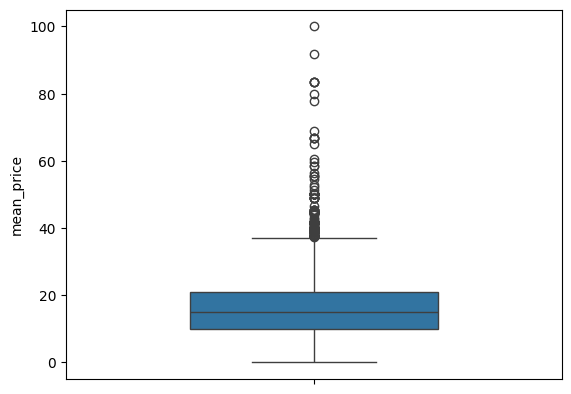

In [332]:
sns.boxplot(data_samples['mean_price'], width = 0.5)

# Большое количество выбросов в целевой переменной

После исследования данных, можно заметить, что есть достаточно много признаков с null значениями. А также в целевой переменной много данных, которые выходят за пределы стандартного отклонения.

In [333]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


___

## Преобразование данных

### Столбцы для удаления

In [334]:
df.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [335]:
# Удаляем столбцы, которые не несут информации для обучения модели
df = df.drop(['Unnamed: 0', 'ФИО',], axis=1)

### Столбец 'предмет'

In [336]:
subjectOrdinalEncoder = OrdinalEncoder()

subjectOrdinalEncoder, df['предмет'] = encode_column(df, ['предмет'])

,предмет,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,1.0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1.0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,0.0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,1.0,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,1.0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


### Столбец 'tutor_head_tags'

In [337]:
# Приводим тип str к list с помощью метода библиотеки ast
df['tutor_head_tags'] = transform_to_list(df, 'tutor_head_tags')

# Проверяем получилось ли перевест к классу list
print(type(df.loc[0, 'tutor_head_tags']))
df.loc[0, 'tutor_head_tags']

<class 'list'>


['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']

In [338]:
# Инициализация MultiLabelBinarizer
mlb_tutor_head_tags = MultiLabelBinarizer()

# Применение MultiLabelBinarizer к колонке 'genres'
encoded_tutor_head_tags = mlb_tutor_head_tags.fit_transform(df['tutor_head_tags'])
encoded_df_tutor_head_tags = pd.DataFrame(encoded_tutor_head_tags, columns=mlb_tutor_head_tags.classes_)

# Присоединяем закодированный df к основному
df = df.join(encoded_df_tutor_head_tags)

In [339]:
# Удаляем обработанное поле
df = df.drop('tutor_head_tags', axis=1)
df.head()

,предмет,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,1.0,5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,1.0,4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0.0,0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
3,1.0,4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1
4,1.0,0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


### Столбец 'tutor_rating'

In [340]:
print('У столбца "Рейтинг преподавателя" отсутствует значений = ', df['tutor_rating'].isnull().sum())

# Заменяем все значения null в этом столбце на 0, т.к. преподаватель не имеет рейтинга
df['tutor_rating'] = df['tutor_rating'].fillna(0)

print('После преобразований у столбца "Рейтинг преподавателя" отсутствует значений = ', df['tutor_rating'].isnull().sum())

У столбца "Рейтинг преподавателя" отсутствует значений =  589
После преобразований у столбца "Рейтинг преподавателя" отсутствует значений =  0


### Столбец 'tutor_reviews'

У столбца "Количество отзывов" отсутствует значений =  0
Довольно много значений выходят за пределы boxplot, но т.к.к это относится к отзывам, это вполне возможно 


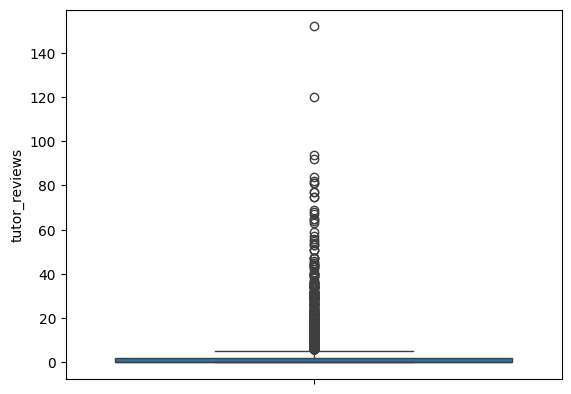

In [341]:
print('У столбца "Количество отзывов" отсутствует значений = ', df['tutor_reviews'].isnull().sum())
df['tutor_reviews'].describe()
sns.boxplot(df['tutor_reviews'])

print('Довольно много значений выходят за пределы boxplot, но т.к.к это относится к отзывам, это вполне возможно ')

In [342]:
df['tutor_reviews'].describe()

,tutor_reviews
count,4548.000000
mean,2.989006
std,8.516939
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,152.000000


### Столбец 'description'

In [343]:
# Переменная, которая сообщает нам, что репитотор не заполнил инфо о себе
no_info_about_tutor = '        Репетитор не предоставил о себе дополнительных сведений    '

count_null_descr = df['description'].isnull().sum()
count_without_descr = df.loc[df['description'] == no_info_about_tutor]

print('Количество преподавателей без описания(null) = ', count_null_descr)
print('Количество преподавателей, которые не предоставили информацию = ', count_without_descr.shape[0])

# Переводим в числовое значение, если описание заполнено или не null, то ставим 1, иначе 0
df['description'] = df['description'].apply(lambda x: 1 if x != no_info_about_tutor and pd.isnull(x) else 0)

Количество преподавателей без описания(null) =  1
Количество преподавателей, которые не предоставили информацию =  1123


### Столбец 'experience_desc'

In [344]:
count_null_experience_desc = df['experience_desc'].isnull().sum()

print('Количество незаполненные строк с описанием своего опыта = ', count_null_experience_desc)

# Если в столбце описания опыта, стоит не null,то единичка, иначе 0
df['experience_desc'] = transaformation_null_value(df, 'experience_desc')



Количество незаполненные строк с описанием своего опыта =  2377


### Столбец 'Education_1' и 'Desc_Education_1'

In [345]:
# Предлагаю убрать столбец Education 1 и Descr Education_1, т.к. так как все, кто учавствует в этой выборке имеют хотя бы 1 университетское образование
df['Education_1'].isnull().sum()

df = df.drop(['Education_1', 'Desc_Education_1'], axis= 1)

### Столбцы под преобразование Null значений

In [346]:
# Берем только столбцы по описанию образования, если они не null, то ставим 1, иначе 0.
# Education удаляем, чтобы не дублировать значения

columns_to_delete = ['Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']
columns_to_transform = ['Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6', 'Ученое звание 2', 'Ученая степень 2']
df = df.drop(columns_to_delete, axis=1)

for col in columns_to_transform:
  df[col] = transaformation_null_value(df, col)

### Ученая степень и звание

In [347]:
print('Количество ученых званий = ', df['Ученое звание 1'].nunique())
print('Количество людей с учеными званиями = ', df.shape[0] - df['Ученое звание 1'].isnull().sum())

print('\nКоличество ученых степеней = ',df['Ученая степень 1'].nunique())
print('Количество людей с учеными степенями = ', df.shape[0] - df['Ученая степень 1'].isnull().sum())

encoder_degree = LabelEncoder()
encoder_rank = LabelEncoder()

df['Ученое звание 1'] = encoder_degree.fit_transform(df['Ученое звание 1'])
df['Ученая степень 1'] = encoder_rank.fit_transform(df['Ученая степень 1'])

Количество ученых званий =  7
Количество людей с учеными званиями =  35

Количество ученых степеней =  13
Количество людей с учеными степенями =  76


### Столбец 'Status'

In [348]:
df['status'] = df['status'].fillna('Частный преподаватель')
df["status"] = df["status"].astype(str).apply(lambda x: x.split(','))

statusMlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(statusMlb.fit_transform(df["status"]), columns=statusMlb.classes_)

df = pd.concat([df, encoded_df], axis=1)
df = df.drop('status', axis=1)

In [349]:
# display(df['status'].value_counts())
df

,предмет,tutor_rating,tutor_reviews,description,experience_desc,Desc_Education_2,Desc_Education_3,Desc_Education_4,Ученая степень 1,Ученое звание 1,experience,Desc_Education_5,Desc_Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель,Частный преподаватель
0,1.0,5.0,2,0,1,1,1,1,13,7,31 год,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,1.0,4.0,7,0,1,0,1,1,13,7,8 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,0.0,0.0,0,0,0,0,0,1,13,7,11 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
3,1.0,4.0,19,0,1,1,1,1,13,7,5 лет,1,1,1,1,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0
4,1.0,0.0,0,0,0,1,1,1,13,7,19 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,1.0,4.0,11,0,1,1,1,1,13,7,5 лет,1,1,1,1,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",16.666667,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0
4544,0.0,0.0,0,0,0,1,1,1,13,7,30 лет,1,1,1,1,['Школьники с 5 по 9 класс'],33.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
4545,0.0,0.0,0,0,0,1,1,1,13,7,6 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
4546,0.0,0.0,0,0,0,1,1,1,13,7,1 год,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",9.722222,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0


In [350]:
df.dtypes

,0
предмет,float64
tutor_rating,float64
tutor_reviews,int64
description,int64
experience_desc,int64
Desc_Education_2,int64
Desc_Education_3,int64
Desc_Education_4,int64
Ученая степень 1,int64
Ученое звание 1,int64


### Столбец 'experience'

In [351]:
# Оставим только числа в колонке
df['experience'] = df['experience'].str.replace(r"[^\d\.]", "", regex=True)
# преобразуем колонку в числовой формат
df['experience'] = df['experience'].astype('float64')

# Заменял на 0, если null
df['experience'] = df['experience'].fillna(0)

### Столбец 'categories'

In [352]:
df['categories'] = transform_to_list(df, 'categories')

# Инициализация MultiLabelBinarizer
mlb_categories = MultiLabelBinarizer()

# Применение MultiLabelBinarizer к колонке 'genres'
encoded_categories = mlb_categories.fit_transform(df['categories'])
encoded_df_categories = pd.DataFrame(encoded_categories, columns=mlb_categories.classes_)

# Присоединяем закодированный df к основному
df = df.join(encoded_df_categories)

df = df.drop('categories', axis=1)

In [353]:
df.head()

,предмет,tutor_rating,tutor_reviews,description,experience_desc,Desc_Education_2,Desc_Education_3,Desc_Education_4,Ученая степень 1,Ученое звание 1,experience,Desc_Education_5,Desc_Education_6,Ученая степень 2,Ученое звание 2,mean_price,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель,Частный преподаватель,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,Студенты университетов,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,1.0,5.0,2,0,1,1,1,1,13,7,31.0,1,1,1,1,16.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1.0,4.0,7,0,1,0,1,1,13,7,8.0,1,1,1,1,11.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.0,0.0,0,0,0,0,0,1,13,7,11.0,1,1,1,1,23.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1.0,4.0,19,0,1,1,1,1,13,7,5.0,1,1,1,1,0.116667,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,1.0,0.0,0,0,0,1,1,1,13,7,19.0,1,1,1,1,16.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Подготовка к обучению модели

## Проверяем корреляционную матрицу

In [354]:
# Перемещаем для удобства целевой столбец в конец
df['mean_price'] = df.pop('mean_price')

In [355]:
# Навсякий случай, если что то забыли перевести из null, то переводим в 0
df = df.fillna(0)

In [356]:
df.head()

,предмет,tutor_rating,tutor_reviews,description,experience_desc,Desc_Education_2,Desc_Education_3,Desc_Education_4,Ученая степень 1,Ученое звание 1,experience,Desc_Education_5,Desc_Education_6,Ученая степень 2,Ученое звание 2,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель,Частный преподаватель,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,Студенты университетов,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа,mean_price
0,1.0,5.0,2,0,1,1,1,1,13,7,31.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,16.666667
1,1.0,4.0,7,0,1,0,1,1,13,7,8.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,11.666667
2,0.0,0.0,0,0,0,0,0,1,13,7,11.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,23.333333
3,1.0,4.0,19,0,1,1,1,1,13,7,5.0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0.116667
4,1.0,0.0,0,0,0,1,1,1,13,7,19.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,16.666667


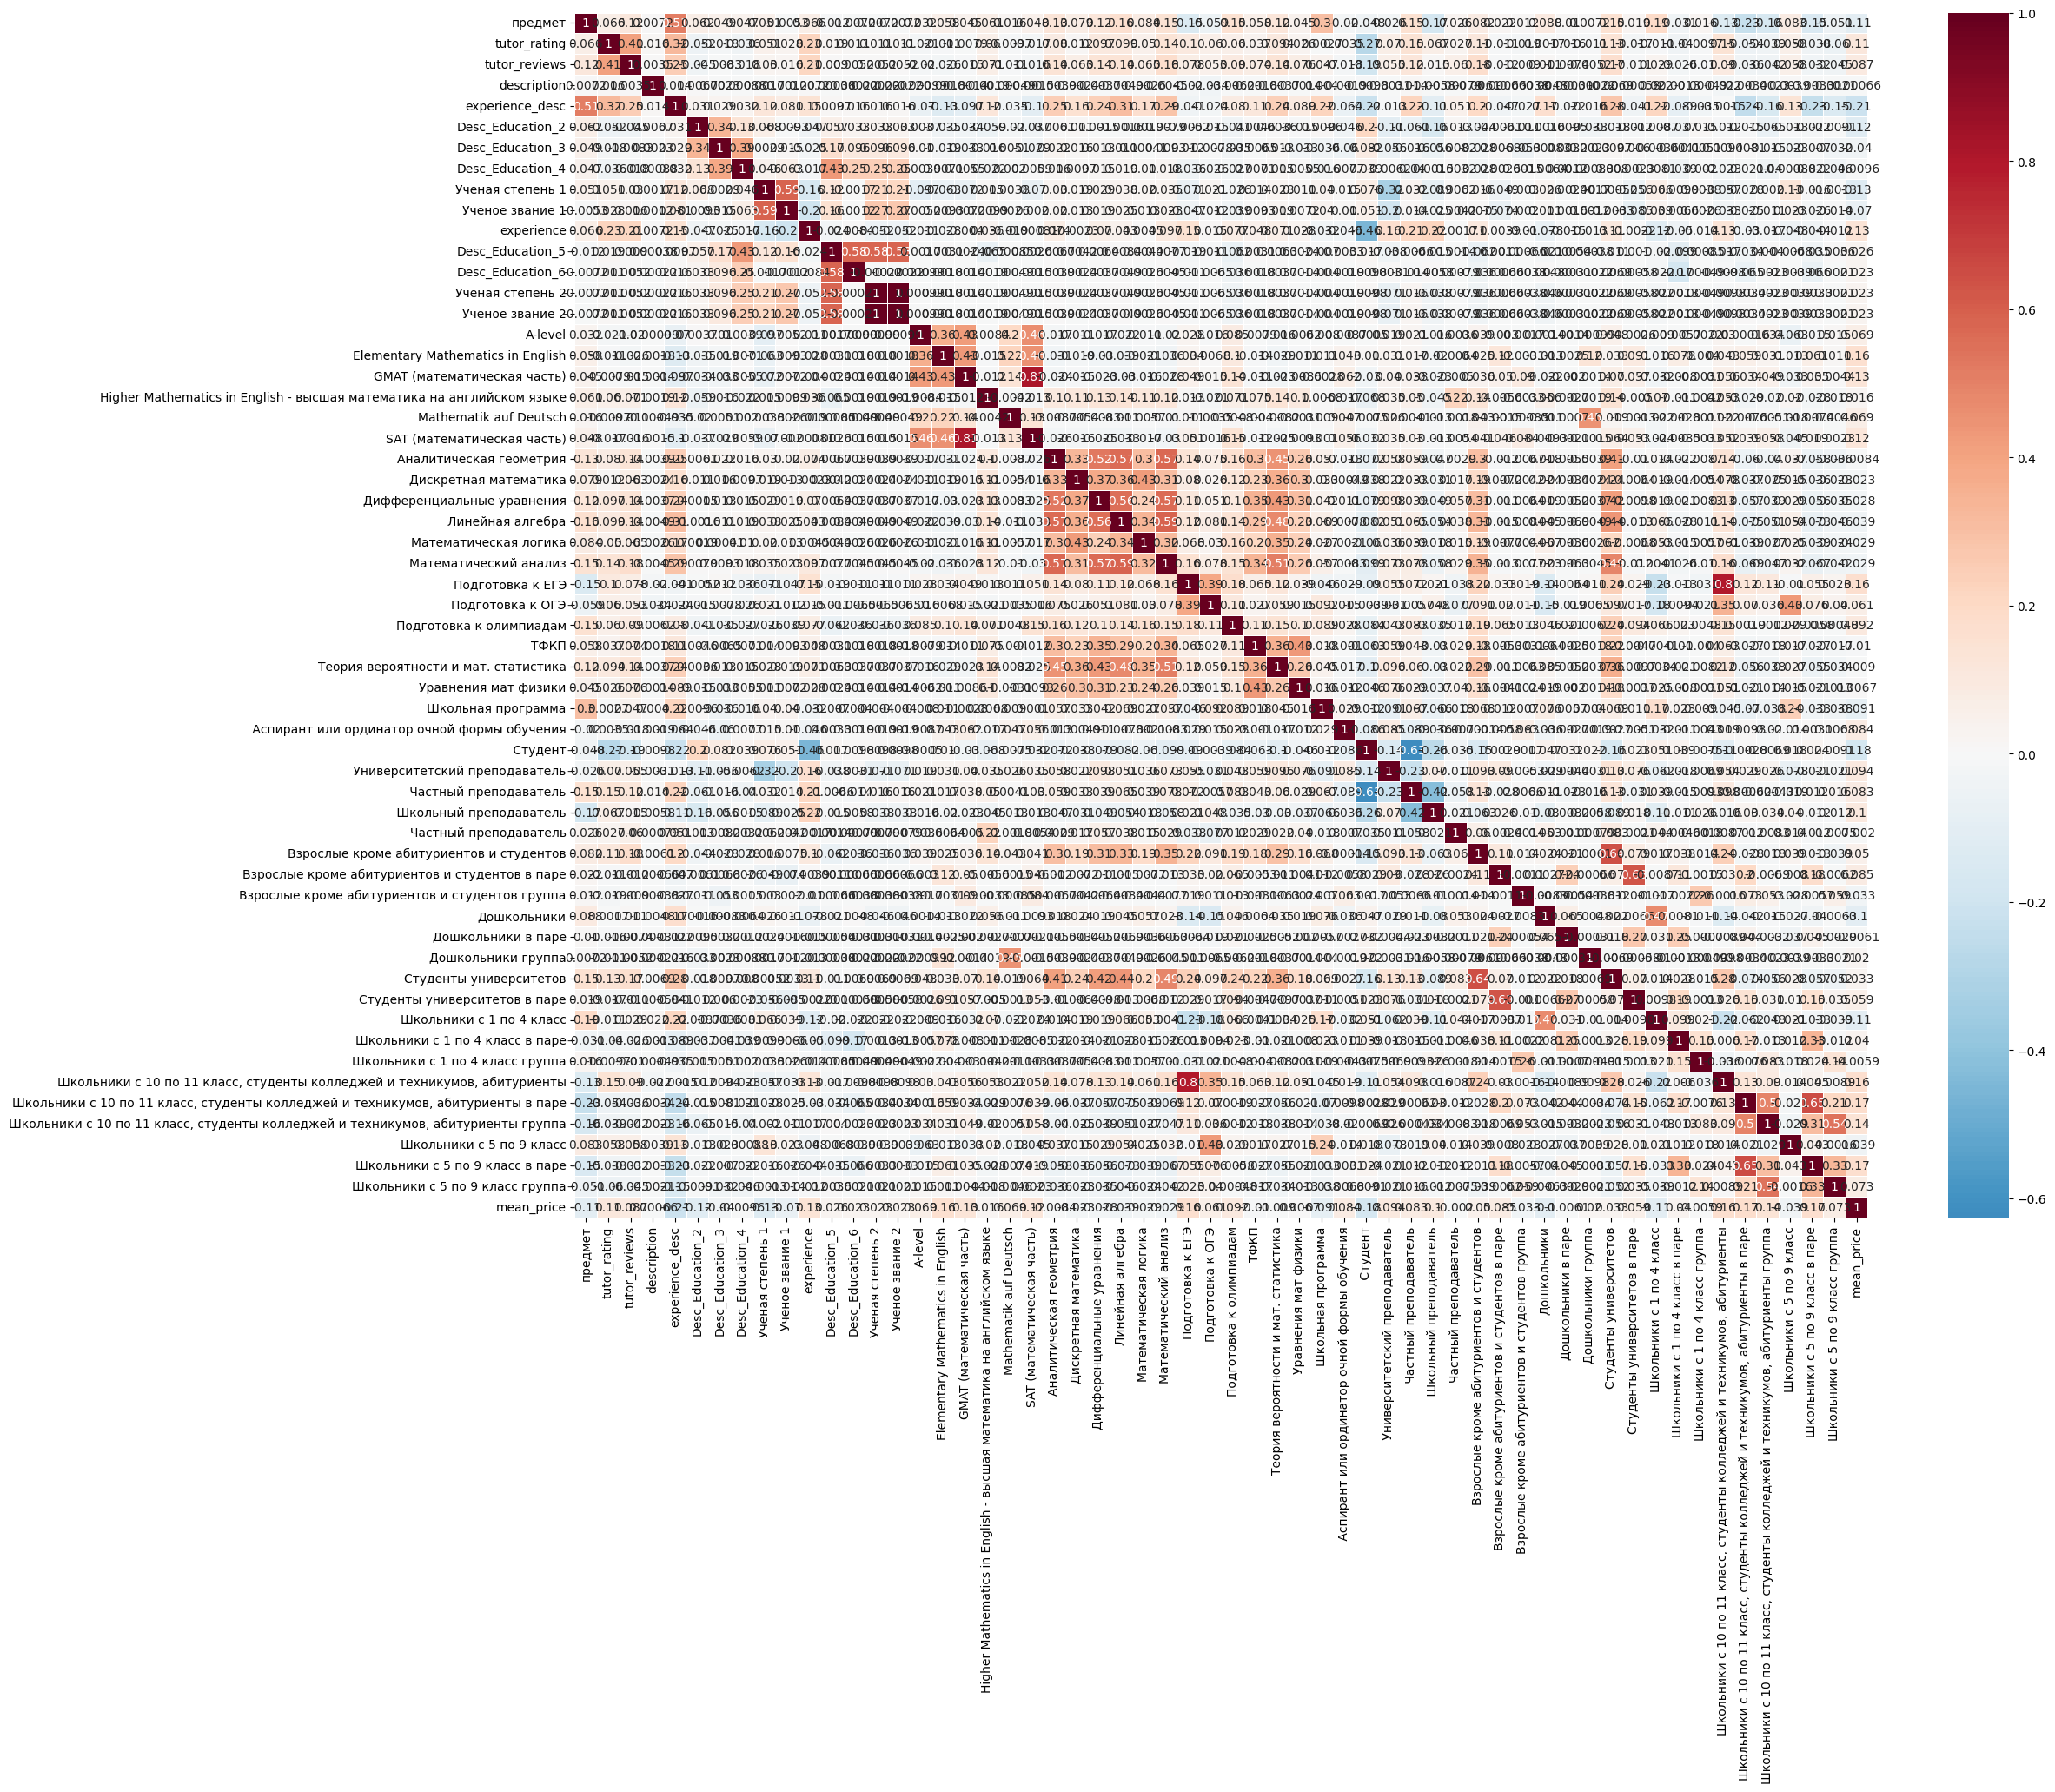

In [357]:
# Строим корреляционную матрицу факторов + целевой признак.
corr_matrix = df.corr()

# рисуем тепловую карту
plt.figure(figsize=(24,18))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, center=0, linewidths=0.5);

In [358]:
target_corr = df.corr()['mean_price']

# Фильтруем признаки, у которых корреляция с целевой переменной близка к 0
low_corr_features = target_corr[(target_corr > -0.05) & (target_corr < 0.05)]

# Выводим признаки
print("Признаки с корреляцией, близкой к 0 с целевой переменной:")
print(low_corr_features.index)
# Получили признаки, которые, имеют минимальное влияние на целевую переменную. В дальнейшем посмотрим коэффициенты и возможно уберем эти признаки

Признаки с корреляцией, близкой к 0 с целевой переменной:
Index(['description', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6', 'Ученая степень 2', 'Ученое звание 2', 'Higher Mathematics in English - высшая математика на английском языке', 'Аналитическая геометрия', 'Дискретная математика', 'Дифференциальные уравнения', 'Линейная алгебра', 'Математическая логика', 'Математический анализ', 'ТФКП', 'Теория вероятности и мат. статистика', 'Уравнения мат физики', 'Частный преподаватель', 'Взрослые кроме абитуриентов и студентов группа', 'Дошкольники в паре', 'Дошкольники группа', 'Студенты университетов', 'Школьники с 1 по 4 класс в паре', 'Школьники с 1 по 4 класс группа', 'Школьники с 5 по 9 класс'], dtype='object')


#### Подготавливаем данные для моделей

In [359]:
# В этой выборке удаляем все признаки c очень низкой корреляцией
X_d = df.drop(columns=low_corr_features.index)
X_d = X_d.drop(columns='mean_price')
y_d = df['mean_price']

In [360]:
# Выделяем признаки(Х) и целевую переменную (y)
X = df.drop(columns=['mean_price'])
y = df['mean_price']

In [361]:
# Разделяем на тестовую и обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (3638, 57), (3638,)
Test dataset size: (910, 57), (910,)


## Обучение моделей ML

### Линейная регрессия

In [362]:
# Создаем модель линейной регрессии
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print('Данные без удаления признаков')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Данные без удаления признаков
Mean Absolute Error: 6.927889435046554
Mean Squared Error: 90.92902400793763
R2 score: 0.14277239274862574


In [363]:
# Создаем модель линейной регрессии
lin_reg_d = LinearRegression()

lin_reg_d.fit(X_train_d, y_train_d)

y_pred_d = lin_reg_d.predict(X_test_d)

print('Данные c удалением признаков с низкой корреляцией')
print('Mean Absolute Error:', mean_absolute_error(y_test_d, y_pred_d))
print('Mean Squared Error:', mean_squared_error(y_test_d, y_pred_d))
print('R2 score:', r2_score(y_test_d, y_pred_d))

Данные c удалением признаков с низкой корреляцией
Mean Absolute Error: 7.069733403954534
Mean Squared Error: 108.51576773029858
R2 score: 0.11939981589420834


Наблюдается небольшое различие, в положительную сторону по MSE, когда убираем признаки с низкой корреляцией.

### Random Forest

In [364]:
# # Определяем параметры для подбора
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Создаем модель
# rf_regressor = RandomForestRegressor(random_state=42)

# # Подбор гиперпараметров с кросс-валидацией
# grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search_reg.fit(X_train, y_train)

# # Лучшие параметры и метрика
# best_params_reg = grid_search_reg.best_params_
# best_score_reg = grid_search_reg.best_score_

In [365]:
# print(best_params_reg)
# Сохранил лучшие гиперпараметры, а подбор закомментировал, потому что занимает больше 15 минут
best_params_reg = {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

In [366]:
rf_regressor = RandomForestRegressor(**best_params_reg)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

print('Данные без удаления признаков')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Данные без удаления признаков
Mean Absolute Error: 6.24808626701412
Mean Squared Error: 80.90858971636787
R2 score: 0.2372394015513608


In [367]:
rf_regressor_d = RandomForestRegressor(**best_params_reg)

rf_regressor_d.fit(X_train_d, y_train_d)

y_pred_d = rf_regressor_d.predict(X_test_d)

print('Данные c удалением признаков')
print('Mean Absolute Error:', mean_absolute_error(y_test_d, y_pred_d))
print('Mean Squared Error:', mean_squared_error(y_test_d, y_pred_d))
print('R2 score:', r2_score(y_test_d, y_pred_d))

Данные c удалением признаков
Mean Absolute Error: 6.677105669915716
Mean Squared Error: 106.4402798274094
R2 score: 0.13624229941177424


В Random Forest при удалении признаков, также видно улучшение прогноза. Продолжаем анализ

### Метод опорных векторов

In [368]:
# # Определяем параметры для подбора
# param_grid_svm = {
#     'kernel': ['poly', 'rbf', 'sigmoid'],
#     'C': [0.1, 1],
#     'epsilon': [0.01, 0.1],
#     'gamma': ['scale', 'auto']
# }


# # Создаем модель
# svr = SVR()

# # Подбор гиперпараметров с использованием MSE
# grid_search_svm = GridSearchCV(
#     estimator=svr,
#     param_grid=param_grid_svm,
#     cv=5,
#     scoring='neg_mean_squared_error',  # Используем MSE
#     n_jobs=-1,
#     verbose=3
# )
# grid_search_svm.fit(X_train, y_train)

# best_params_reg_svr = grid_search_svm.best_params_
# best_score_reg_svr = grid_search_svm.best_score_
# print(best_params_reg_svr)

In [369]:
# Записал лучшие параметры, т.к. иначе очень долго ждать
best_params_reg_svr = {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

svr = SVR(**best_params_reg_svr)

svr.fit(X_train, y_train)

y_pred_svr = rf_regressor.predict(X_test)

print('Данные без удаления признаков')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('R2 score:', r2_score(y_test, y_pred_svr))

Данные без удаления признаков
Mean Absolute Error: 6.24808626701412
Mean Squared Error: 80.90858971636787
R2 score: 0.2372394015513608


In [370]:
svr_d = SVR(**best_params_reg_svr)

svr_d.fit(X_train_d, y_train_d)

y_pred_svr_d = svr_d.predict(X_test_d)

print('Данные без удаления признаков')
print('Mean Absolute Error:', mean_absolute_error(y_test_d, y_pred_svr_d))
print('Mean Squared Error:', mean_squared_error(y_test_d, y_pred_svr_d))
print('R2 score:', r2_score(y_test_d, y_pred_svr_d))

Данные без удаления признаков
Mean Absolute Error: 7.119897141896587
Mean Squared Error: 113.66947663410714
R2 score: 0.07757771847514061


Не существенное различие между разными типами моделей. Попробуем предсказать это на тесте.

## Предсказания для test

### Подготовка dataframe

In [371]:
# dataframe без удалений признаков с низкой корреляцией переменной
df = data_test.copy()

df = df.drop(['Unnamed: 0', 'ФИО',], axis=1)

df['предмет'] = subjectOrdinalEncoder.transform( df[['предмет']])

df['tutor_head_tags'] = transform_to_list(df, 'tutor_head_tags')
tutor_head_tags_test = mlb_tutor_head_tags.transform(df['tutor_head_tags'])
encoded_df_tutor_head_tags_test = pd.DataFrame(tutor_head_tags_test, columns=mlb_tutor_head_tags.classes_)
df = df.join(encoded_df_tutor_head_tags)
df = df.drop('tutor_head_tags', axis=1)

df['tutor_rating'] = transaformation_null_value(df, 'tutor_rating')

df['description'] = df['description'].apply(lambda x: 1 if x != no_info_about_tutor and pd.isnull(x) else 0)

df['experience_desc'] = transaformation_null_value(df, 'experience_desc')

df = df.drop(['Education_1', 'Desc_Education_1'], axis= 1)

columns_to_delete = ['Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']
columns_to_transform = ['Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6', 'Ученое звание 2', 'Ученая степень 2']
df = df.drop(columns_to_delete, axis=1)

df['Ученое звание 1'] = encoder_degree.transform(df['Ученое звание 1'])
df['Ученая степень 1'] = encoder_rank.transform(df['Ученая степень 1'])

df['status'] = df['status'].fillna('Частный преподаватель')
df["status"] = df["status"].astype(str).apply(lambda x: x.split(','))

encoded_df = pd.DataFrame(statusMlb.transform(df["status"]), columns=statusMlb.classes_)

df = pd.concat([df, encoded_df], axis=1)
df = df.drop('status', axis=1)

for col in columns_to_transform:
  df[col] = transaformation_null_value(df, col)

df['experience'] = df['experience'].str.replace(r"[^\d\.]", "", regex=True)
df['experience'] = df['experience'].astype('float64')
df['experience'] = df['experience'].fillna(0)

df['categories'] = transform_to_list(df, 'categories')
encoded_categories_test = mlb_categories.transform(df['categories'])
encoded_df_categories_test = pd.DataFrame(encoded_categories_test, columns=mlb_categories.classes_)
df = df.join(encoded_df_categories_test)
df = df.drop('categories', axis=1)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


In [378]:
# dataframe c удалением признаков с низкой корреляцией переменной
df_d = data_test.copy()

df_d = df_d.drop(['Unnamed: 0', 'ФИО',], axis=1)

df_d['предмет'] = subjectOrdinalEncoder.transform( df_d[['предмет']])

df_d['tutor_head_tags'] = transform_to_list(df_d, 'tutor_head_tags')
tutor_head_tags_test = mlb_tutor_head_tags.transform(df_d['tutor_head_tags'])
encoded_df_tutor_head_tags_test = pd.DataFrame(tutor_head_tags_test, columns=mlb_tutor_head_tags.classes_)
df_d = df_d.join(encoded_df_tutor_head_tags)
df_d = df_d.drop('tutor_head_tags', axis=1)

df_d['tutor_rating'] = transaformation_null_value(df_d, 'tutor_rating')

df_d['description'] = df_d['description'].apply(lambda x: 1 if x != no_info_about_tutor and pd.isnull(x) else 0)

df_d['experience_desc'] = transaformation_null_value(df_d, 'experience_desc')

df_d = df_d.drop(['Education_1', 'Desc_Education_1'], axis= 1)

columns_to_delete = ['Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']
columns_to_transform = ['Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6', 'Ученое звание 2', 'Ученая степень 2']
df_d = df_d.drop(columns_to_delete, axis=1)

df_d['Ученое звание 1'] = encoder_degree.transform(df_d['Ученое звание 1'])
df_d['Ученая степень 1'] = encoder_rank.transform(df_d['Ученая степень 1'])

df_d['status'] = df_d['status'].fillna('Частный преподаватель')
df_d["status"] = df_d["status"].astype(str).apply(lambda x: x.split(','))
encoded_df = pd.DataFrame(statusMlb.transform(df_d["status"]), columns=statusMlb.classes_)
df_d = pd.concat([df_d, encoded_df], axis=1)
df_d = df_d.drop('status', axis=1)

for col in columns_to_transform:
  df_d[col] = transaformation_null_value(df_d, col)

df_d['experience'] = df_d['experience'].str.replace(r"[^\d\.]", "", regex=True)
df_d['experience'] = df_d['experience'].astype('float64')
df_d['experience'] = df_d['experience'].fillna(0)

df_d['categories'] = transform_to_list(df_d, 'categories')
encoded_categories_test = mlb_categories.transform(df_d['categories'])
encoded_df_categories_test = pd.DataFrame(encoded_categories_test, columns=mlb_categories.classes_)
df_d = df_d.join(encoded_df_categories_test)
df_d = df_d.drop('categories', axis=1)

df_d = df_d.drop(columns=low_corr_features.index)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


### Линейная регрессия

In [379]:
# Предсказание без удаления признаков
y_pred_lin_reg = lin_reg.predict(df)
submition_lin_reg = pd.DataFrame(y_pred_lin_reg, columns=['mean_price'])
submition_lin_reg = submition_lin_reg.reset_index()
submition_lin_reg.to_csv('submit_lin_reg.csv', index=False)

In [380]:
# Предсказание с удалением признаков с низкой корреляцией
y_pred_lin_reg_d = lin_reg_d.predict(df_d)
submition_lin_reg_d = pd.DataFrame(y_pred_lin_reg_d, columns=['mean_price'])
submition_lin_reg_d = submition_lin_reg_d.reset_index()
submition_lin_reg_d.to_csv('submit_lin_reg_d.csv', index=False)

### Random Forest

In [382]:
y_pred_rf = rf_regressor.predict(df)
submition_rf = pd.DataFrame(y_pred_rf, columns=['mean_price'])
submition_rf = submition_rf.reset_index()
submition_rf.to_csv('submit_rf.csv', index=False)

In [383]:
y_pred_rf_d = rf_regressor_d.predict(df_d)
submition_rf_d = pd.DataFrame(y_pred_rf_d, columns=['mean_price'])
submition_rf_d = submition_rf_d.reset_index()
submition_rf_d.to_csv('submit_rf_d.csv', index=False)

### Метод опорных векторов

In [384]:
y_pred_svr = svr.predict(df)
submition_svr = pd.DataFrame(y_pred_svr, columns=['mean_price'])
submition_svr = submition_svr.reset_index()
submition_svr.to_csv('submit_svr.csv', index=False)

In [385]:
y_pred_svr_d = svr_d.predict(df_d)
submition_svr_d = pd.DataFrame(y_pred_svr_d, columns=['mean_price'])
submition_svr_d = submition_svr_d.reset_index()
submition_svr_d.to_csv('submit_svr_d.csv', index=False)

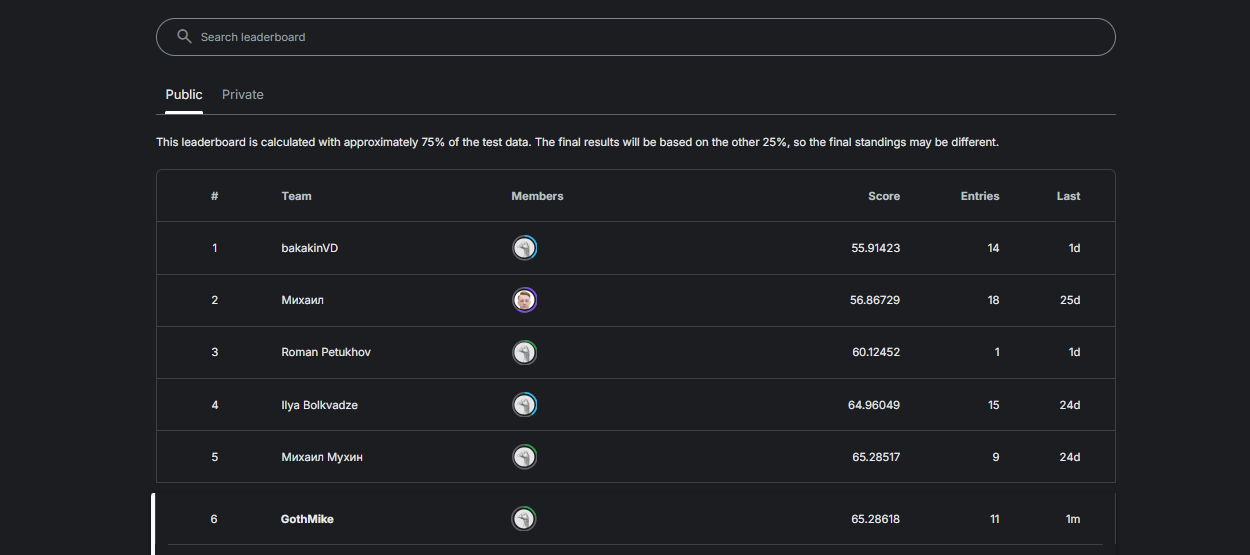

Лучшая модель в моем случае была random forest, гиперпараметры были подобраны более удачно, а также были лучшие данные на тренировочных данных